In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from tensorflow.keras import utils

In [71]:
import matplotlib.pyplot as plt

In [29]:
# mnist = input_data.read_data_sets('mnist_dataset/',one_hot=True)

### quick start

In [15]:
# 创建随机数
train_x = np.random.random((1000, 32))
train_y = np.random.random((1000, 10))

val_x = np.random.random((200, 32))
val_y = np.random.random((200, 10))

In [16]:
# 层的线性堆叠
model = keras.Sequential()

In [17]:
# 输入层
model.add(layers.Dense(32, activation='relu'))
# 隐藏层
model.add(layers.Dense(64,activation='relu'))
# 输出层
model.add(layers.Dense(10,activation='softmax'))

In [19]:
# 配置模型训练，优化算法，损失函数，评价标准
model.compile(optimizer=keras.optimizers.Adam(0.01), loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])

In [27]:
# 训练模型。
model.fit(train_x, train_y, epochs=10, batch_size=100, validation_data=(val_x, val_y))

Train on 1000 samples, validate on 200 samples
Epoch 1/10
1000/1000 [==============================] - 0s 300us/step - loss: 11.4426 - categorical_accuracy: 0.1590 - val_loss: 11.5760 - val_categorical_accuracy: 0.0950
Epoch 2/10
1000/1000 [==============================] - 0s 50us/step - loss: 11.4340 - categorical_accuracy: 0.1630 - val_loss: 11.5716 - val_categorical_accuracy: 0.0950
Epoch 3/10
1000/1000 [==============================] - 0s 77us/step - loss: 11.4237 - categorical_accuracy: 0.1870 - val_loss: 11.5819 - val_categorical_accuracy: 0.0950
Epoch 4/10
1000/1000 [==============================] - 0s 43us/step - loss: 11.4198 - categorical_accuracy: 0.1920 - val_loss: 11.5901 - val_categorical_accuracy: 0.0700
Epoch 5/10
1000/1000 [==============================] - 0s 55us/step - loss: 11.4100 - categorical_accuracy: 0.1720 - val_loss: 11.5965 - val_categorical_accuracy: 0.0800
Epoch 6/10
1000/1000 [==============================] - 0s 48us/step - loss: 11.4037 - categorica

- tf.data.Dataset.from_tensor_slices
- tf.data.Dataset API
- 大数据集或者多设备训练时使用

In [22]:
# 加载数据，并特征切片
dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
# 打乱数据
dataset.shuffle(1000)
# 设置batch,一次喂入32个数据
dataset = dataset.batch(32)  # 在后续fit可不再设置batch
# 循环迭代
dataset = dataset.repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_dataset.shuffle(1000)
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.repeat()

In [23]:
model.fit(dataset, epochs=10, steps_per_epoch=30,
          validation_data=val_dataset, validation_steps=3)

Epoch 1/10
30/30 [==============================] - 0s 12ms/step - loss: 11.4901 - categorical_accuracy: 0.1323 - val_loss: 11.4406 - val_categorical_accuracy: 0.1250
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 11.4631 - categorical_accuracy: 0.1417 - val_loss: 11.7110 - val_categorical_accuracy: 0.0729
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 11.4462 - categorical_accuracy: 0.1510 - val_loss: 11.2694 - val_categorical_accuracy: 0.0417
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 11.4380 - categorical_accuracy: 0.1521 - val_loss: 11.5909 - val_categorical_accuracy: 0.0938
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 11.4560 - categorical_accuracy: 0.1479 - val_loss: 11.4823 - val_categorical_accuracy: 0.1354
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 11.4404 - categorical_accuracy: 0.1490 - val_loss: 11.3870 - val_categorical_accuracy: 0.0938
Epo

In [24]:
test_x = np.random.random((1000, 32))
test_y = np.random.random((1000, 10))
model.evaluate(test_x, test_y, batch_size=32)
test_data = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_data = test_data.batch(32).repeat()
model.evaluate(test_data, steps=30)

30/30 [==============================] - 0s 2ms/step


[11.494850571950277, 0.10208333333333333]

In [28]:
result = model.predict(test_x, batch_size=32)
print(result[0])

[0.10677662 0.09956644 0.06182152 0.10405548 0.1178876  0.10788205
 0.07197639 0.10449593 0.11063342 0.11490465]


### 方法及参数

1. 快速手写数字识别

In [83]:
# 加载手写数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

- keras.layers.Flatten：将数据展平
- keras.layers.Dropout："抓爆"，随机的暂时将部分神经单元丢弃，常用于防止过拟合

In [56]:
# layers参数设置：kernel使用l1正则化，bias使用l2正则化，kernel初始化为随机正交矩阵，bias初始化为常数2.0
model = keras.Sequential(
   [ layers.Flatten(input_shape=(28,28)),
    layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l1(0.01),
                 bias_regularizer=keras.regularizers.l2(0.01),
                 kernel_initializer='orthogonal',bias_initializer=tf.keras.initializers.Constant(2.0)),
    layers.Dropout(rate=0.1),
    layers.Dense(10,activation='softmax')]
)

1. optimizer: keras.optimizers中有各类优化算法
2. loss: keras.losses中含损失函数。字符串指定常用默认损失函数如"mse","categorical_crossentropy","binary_crossentropy".
3. metrics： keras.metrics中含度量函数。
4. 设置run_eagerly=True让评估更快(2.0版支持)。

In [65]:
# 编译模型,指定优化算法，损失函数和度量
# optimizer参数：可使用keras.optimizers中优化算法，也可用字符串（如'adam','sgd'）指定默认方法
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

- epochs：迭代次数。
- batch_size：每次迭代使用的样本数
- validation_data：实时监测验证集上效果，每次迭代执行一次

In [78]:
%%time
# 训练
model.fit(x_train,y_train,epochs=2,,batch_size=100,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 111us/step - loss: 1.0307 - acc: 0.8734 - val_loss: 0.9083 - val_acc: 0.8972
Epoch 2/2
60000/60000 [==============================] - 7s 109us/step - loss: 0.9828 - acc: 0.8764 - val_loss: 0.8426 - val_acc: 0.9138
Wall time: 13.2 s


In [79]:
# 验证，返回loss和metric值
model.evaluate(x=x_test,y=y_test)

10000/10000 [==============================] - 0s 32us/step


[0.8426185896873474, 0.9138]

- keras.Sequential只能构建层堆积模型
- keras.Model函数接口可构建其他复杂模型

In [8]:
train_x = np.random.random((1000, 32))
train_y = np.random.random((1000, 10))

val_x = np.random.random((200, 32))
val_y = np.random.random((200, 10))

In [108]:
# 通过keras.Model函数接口构建全连接网络
inputs = keras.Input(shape=(32,)) # 返回输入占位符
x1 = layers.Dense(64,activation='relu')(inputs)
x2 = layers.Dense(64,activation='relu')(x1)
outputs = layers.Dense(10,activation='softmax')(x2)
model = keras.Model(inputs,outputs)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [109]:
model.fit(train_x,train_y,batch_size=20,epochs=10,validation_data=(val_x,val_y))

Train on 1000 samples, validate on 200 samples
Epoch 1/10
1000/1000 [==============================] - 1s 607us/step - loss: 11.5531 - acc: 0.0990 - val_loss: 11.4991 - val_acc: 0.1150
Epoch 2/10
1000/1000 [==============================] - 0s 101us/step - loss: 11.5308 - acc: 0.0820 - val_loss: 11.4943 - val_acc: 0.1150
Epoch 3/10
1000/1000 [==============================] - 0s 98us/step - loss: 11.5264 - acc: 0.0840 - val_loss: 11.4916 - val_acc: 0.1150
Epoch 4/10
1000/1000 [==============================] - 0s 116us/step - loss: 11.5234 - acc: 0.0930 - val_loss: 11.4893 - val_acc: 0.1200
Epoch 5/10
1000/1000 [==============================] - 0s 107us/step - loss: 11.5208 - acc: 0.1010 - val_loss: 11.4864 - val_acc: 0.1100
Epoch 6/10
1000/1000 [==============================] - 0s 101us/step - loss: 11.5183 - acc: 0.0970 - val_loss: 11.4847 - val_acc: 0.1000
Epoch 7/10
1000/1000 [==============================] - 0s 140us/step - loss: 11.5161 - acc: 0.0990 - val_loss: 11.4831 - val_

- Model类继承

In [163]:
class ModelTest(keras.Model):
    def __init__(self,input_nums,output_nums):
        super(ModelTest, self).__init__(name='ModelTest')
        # 定义层
        self.x = layers.Dense(64,input_shape=(32,))
        self.x1 = layers.Dense(128,activation='relu')
        self.x2 = layers.Dense(64,activation='relu')
        self.x3 = layers.Dense(output_nums,activation='softmax')
    def call(self,inputs):
        # 定义前向传递
        i = self.x(inputs)
        x1 = self.x1(i)
        x2 = self.x2(x1)
        return   self.x3(x2)

In [164]:
model_t = ModelTest(32,10)
model_t.compile(optimizer=keras.optimizers.Adam(0.01),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
model_t.fit(x=train_x,y=train_y,epochs=10,batch_size=100)

Epoch 1/10
1000/1000 [==============================] - 1s 777us/step - loss: 11.5632 - acc: 0.0960
Epoch 2/10
1000/1000 [==============================] - 0s 39us/step - loss: 11.5085 - acc: 0.1190
Epoch 3/10
1000/1000 [==============================] - 0s 34us/step - loss: 11.5094 - acc: 0.1070
Epoch 4/10
1000/1000 [==============================] - 0s 36us/step - loss: 11.5078 - acc: 0.1000
Epoch 5/10
1000/1000 [==============================] - 0s 48us/step - loss: 11.5076 - acc: 0.1150
Epoch 6/10
1000/1000 [==============================] - 0s 39us/step - loss: 11.5078 - acc: 0.1010
Epoch 7/10
1000/1000 [==============================] - 0s 34us/step - loss: 11.5075 - acc: 0.1240
Epoch 8/10
1000/1000 [==============================] - 0s 34us/step - loss: 11.5075 - acc: 0.1210
Epoch 9/10
1000/1000 [==============================] - 0s 36us/step - loss: 11.5074 - acc: 0.1230
Epoch 10/10
1000/1000 [==============================] - 0s 55us/step - loss: 11.5077 - acc: 0.1090


In [150]:
# 模型保存和加载
model.save('./model.h5')
model = tf.keras.models.load_model('./model.h5')

In [154]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 32)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_86 (Dense)             (None, 10)                650       
Total params: 6,922
Trainable params: 6,922
Non-trainable params: 0
_________________________________________________________________


### CNN on mnist

In [84]:
# 调整数据集shape
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [77]:
# 定义模型结果
model = keras.Sequential(
            [
             layers.Conv2D(kernel_size=(5,5),activation='relu',filters=16,padding='same',input_shape=(28,28,1)),
             layers.MaxPooling2D(pool_size=(2,2)),
             layers.Conv2D(kernel_size=(6,6),activation='relu',filters=16,padding='same'),
             layers.MaxPool2D(pool_size=(2,2)),
             layers.Dropout(0.2),
             layers.Flatten(),
             layers.Dense(units=128,activation='relu'),
             layers.Dropout(0.1),
             layers.Dense(units=10,activation='softmax')
            ]
                )

In [78]:
# 配置参数
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        9232      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
__________

In [86]:
# 训练
train_history = model.fit(x_train,y_train,batch_size=300,epochs=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 13s 268us/step - loss: 0.4674 - acc: 0.8562 - val_loss: 0.1055 - val_acc: 0.9683
Epoch 2/10
48000/48000 [==============================] - 11s 238us/step - loss: 0.1153 - acc: 0.9642 - val_loss: 0.0747 - val_acc: 0.9769
Epoch 3/10
48000/48000 [==============================] - 12s 259us/step - loss: 0.0804 - acc: 0.9749 - val_loss: 0.0541 - val_acc: 0.9838
Epoch 4/10
48000/48000 [==============================] - 13s 264us/step - loss: 0.0642 - acc: 0.9794 - val_loss: 0.0480 - val_acc: 0.9855
Epoch 5/10
48000/48000 [==============================] - 13s 261us/step - loss: 0.0528 - acc: 0.9832 - val_loss: 0.0438 - val_acc: 0.9865
Epoch 6/10
48000/48000 [==============================] - 13s 263us/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0384 - val_acc: 0.9886
Epoch 7/10
48000/48000 [==============================] - 12s 252us/step - loss: 0.0402 - acc: 0.9872 - val_loss: 0.

Text(0.5,0,'epochs')

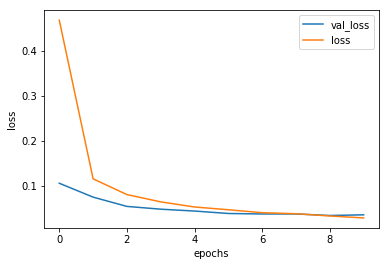

In [89]:
plt.plot(train_history.history.get('val_loss'))
plt.plot(train_history.history.get('loss'))
plt.legend(['val_loss','loss'])
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5,0,'epochs')

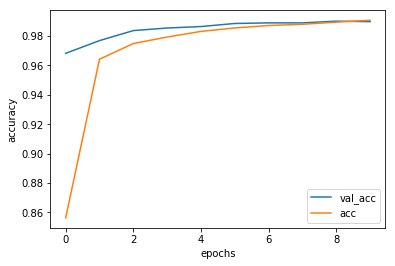

In [90]:
plt.plot(train_history.history.get('val_acc'))
plt.plot(train_history.history.get('acc'))
plt.legend(['val_acc','acc'])
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [104]:
# 评价
print(f"the accuracy on test is {model.evaluate(x_test,y_test)[1]}")

10000/10000 [==============================] - 1s 121us/step
the accuracy on test is 0.9915


In [94]:
# 预测
model.predict_classes(x_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)